In [1]:
#
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
#
from sklearn.linear_model import LogisticRegression
import multiprocessing

import xgboost as xgb
xgb.set_config(verbosity=1)

#
from util.Util import plot_accuracies, read_csv
from df_features import DataFrameFeatures
from df_classifier import DataFrameClassifier

file_names = ['Computer vision','Consulting','Fintech','Fish processing equipment','Healthcare','House builders','Industrial vertical investor','Innovative','IoT','IT freelance','M&A advisors','Manufacturers','Online games','Payments tech','PE fund','Procurement software','Resource-efficiency','SaaS','Sustainability','Wind turbine tech']

In [2]:
# Read GLOVE embeddings from file
glove_df = read_csv('util/glove/glove.42B.300d.txt', sep=" ", index_col=0, quoting=3, header=None)
glove_embeddings = {key: val.values for key, val in tqdm(glove_df.T.items())}
del glove_df # Delete glove_df to free up memory

* Reading CSV from path: util/glove/glove.42B.300d.txt. Size: (1917494, 300)


1917494it [00:21, 87577.83it/s]


In [3]:
# Read the cleaned dataframe
full_df = read_csv('data/processed_data/cleaned_v1.csv')

# Create tf-idf vectorizer using the main col and a max of 250 features
main_col = 'description_no_stopwords_stemmed'
vectorizer = TfidfVectorizer(max_features=250)
vectorizer.fit_transform(full_df[main_col])

full_dff = DataFrameFeatures(df=full_df, vectorizer=vectorizer, main_col=main_col, verbose=False)

* Reading CSV from path: data/processed_data/cleaned_v1.csv. Size: (60122, 7)


In [4]:
dfc1 = DataFrameClassifier(dff=full_dff, glove_embeddings=glove_embeddings, file_name='Computer vision')

dfc1.dff.keyword_rank("this is a test of how well the keyword extractor works")

* Reading CSV from path: data/train/Computer vision.csv. Size: (201, 3)
Initializing DataFrameFeatures object


In [4]:
# SHOULD GIVE HIGHER ACCURACY WHEN TRAINING AND TESTING ON THE SAME  # 0.55
dfc1 = DataFrameClassifier(dff=full_dff, glove_embeddings=glove_embeddings, file_name='Computer vision', verbose=False)
X_train, y_train = dfc1.get_feature_vectors(split=False)

dfc2 = DataFrameClassifier(dff=full_dff, glove_embeddings=glove_embeddings, file_name='Fish processing equipment', verbose=False)
X_test, y_test = dfc2.get_feature_vectors(split=False)

# dfc1 = DataFrameClassifier(dff=full_dff, glove_embeddings=glove_embeddings, file_name='Fintech', verbose=False)
# X_train = dfc1.dff.fitted_vectorizer.toarray()
# _, y_train = dfc1.get_feature_vectors(split=False)

# dfc2 = DataFrameClassifier(dff=full_dff, glove_embeddings=glove_embeddings, file_name='Fish processing equipment', verbose=False)
# X_test = dfc2.dff.fitted_vectorizer.toarray()
# _, y_test = dfc2.get_feature_vectors(split=False)

# clf = LogisticRegression(random_state=0, class_weight='balanced', fit_intercept=False, n_jobs=multiprocessing.cpu_count() // 2).fit(X_train, y_train)

xg_b = xgb.XGBRegressor(objective ='binary:logistic', eval_metric='map')
_ = xg_b.fit(X_train, y_train)


/Users/sebastianbitsch/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sebastianbitsch/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sebastianbitsch/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sebastianbitsch/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: Expected 2D array, got 1D array instead:
array=[nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:

preds = xg_b.predict(X_test)
average_precision_score(y_test, preds)

0.33445350593450673

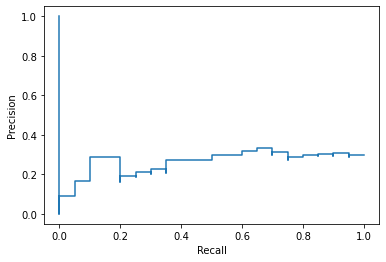

In [8]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, preds)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()


In [ ]:
clf.coef_

In [6]:
dfc1 = DataFrameClassifier(dff=full_dff, glove_embeddings=glove_embeddings, file_name='Computer vision')
X_train, y_train = dfc1.get_feature_vectors(split=False)

dfc2 = DataFrameClassifier(dff=full_dff, glove_embeddings=glove_embeddings, file_name='Consulting')
X_test, y_test = dfc2.get_feature_vectors(split=False)


* Reading CSV from path: data/train/Computer vision.csv. Size: (201, 3)
Initializing DataFrameFeatures object


/Users/sebastianbitsch/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sebastianbitsch/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sebastianbitsch/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sebastianbitsch/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: Expected 2D array, got 1D array instead:
array=[nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
dfc1.dff.overlapping_words_rank(text)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

np.array([cosine_similarity([x],query_vector)[0][0] for x in dfc1.dff.fitted_vectorizer.toarray()])

In [ ]:
dfc1 = DataFrameClassifier(dff=full_dff, glove_embeddings=glove_embeddings, file_name='Computer vision')
X_train = dfc1.dff.fitted_vectorizer.toarray()
_, y_train = dfc1.get_feature_vectors(split=False)

dfc2 = DataFrameClassifier(dff=full_dff, glove_embeddings=glove_embeddings, file_name='Consulting')
X_test = dfc2.dff.fitted_vectorizer.toarray()
_, y_test = dfc2.get_feature_vectors(split=False)

xg_reg = xgb.XGBRegressor(objective ='rank:map', eval_metric='map', n_jobs=multiprocessing.cpu_count() // 2)

xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)
score = np.sqrt(mean_squared_error(y_test, preds))
print(score)
preds = xg_reg.predict(X_train)
score = np.sqrt(mean_squared_error(y_train, preds))
score

In [1]:
dfc1 = DataFrameClassifier(dff=full_dff, glove_embeddings=glove_embeddings, file_name='Computer vision')
X_train = dfc1.dff.fitted_vectorizer.toarray()
_, y_train = dfc1.get_feature_vectors(split=False)

dfc2 = DataFrameClassifier(dff=full_dff, glove_embeddings=glove_embeddings, file_name='Consulting')
X_test = dfc2.dff.fitted_vectorizer.toarray()
_, y_test = dfc2.get_feature_vectors(split=False)

clf = LogisticRegression(random_state=0, class_weight='balanced', fit_intercept=False, n_jobs=multiprocessing.cpu_count() // 2).fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

NameError: name 'DataFrameClassifier' is not defined

In [ ]:
from sklearn.metrics import average_precision_score

average_precision_score()

In [31]:

dfc1 = DataFrameClassifier(dff=full_dff, glove_embeddings=glove_embeddings, file_name='Computer vision', verbose=False)
X_train, y_train = dfc1.get_feature_vectors(split=False)

dfc2 = DataFrameClassifier(dff=full_dff, glove_embeddings=glove_embeddings, file_name='Fish processing equipment', verbose=False)
X_test, y_test = dfc2.get_feature_vectors(split=False)

clf = LogisticRegression(random_state=0, class_weight='balanced', fit_intercept=False, n_jobs=multiprocessing.cpu_count() // 2).fit(X_train, y_train)
#xg_reg = xgb.XGBRegressor(objective ='binary:logistic', eval_metric='map', n_jobs=multiprocessing.cpu_count() // 2).fit(X_train, y_train)

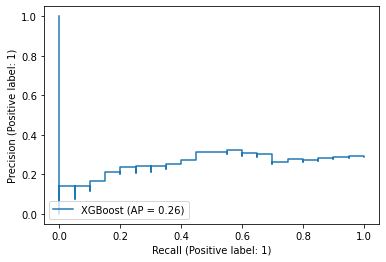

In [34]:
preds = xg_reg.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, preds,name="XGBoost")
plt.show()

Average precision: 0.30496221509588284


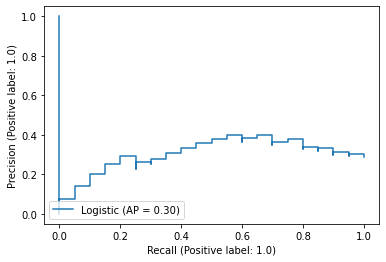

In [35]:
ap = average_precision_score(y_test,clf.decision_function(X_test))
print(f"Average precision: {ap}")

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test,name="Logistic")
plt.show()

### train one test all

In [4]:
dfcs = {}
predictions = [[] for _ in range(len(file_names))]
accuracies = [[] for _ in range(len(file_names))]

# Create all the dfcs once
for file_name in tqdm(file_names):
    dfcs[file_name] = DataFrameClassifier(dff=full_dff, glove_embeddings=glove_embeddings, file_name=file_name, verbose=False)

# Calculate the accuracies
for i, train_file in tqdm(enumerate(file_names)):

    X_train, y_train = dfcs[train_file].get_feature_vectors(split=False)
    # X_train = dfcs[train_file].dff.fitted_vectorizer.toarray()
    # _, y_train = dfcs[train_file].get_feature_vectors(split=False)

    for test_file in file_names:
        X_test, y_test = dfcs[test_file].get_feature_vectors(split=False)
        # X_test = dfcs[test_file].dff.fitted_vectorizer.toarray()
        # _, y_test = dfcs[test_file].get_feature_vectors(split=False)

        clf = LogisticRegression(random_state=0, class_weight='balanced', fit_intercept=False, n_jobs=multiprocessing.cpu_count() // 2).fit(X_train, y_train)

        # xg_reg = xgb.XGBRegressor(objective ='binary:logistic', eval_metric='map', n_jobs=multiprocessing.cpu_count() // 2).fit(X_train, y_train).fit(X_train, y_train)
        # preds = xg_reg.predict(X_test)        
        # score = np.sqrt(mean_squared_error(y_test, preds))
        # predictions[i].append(preds)
        accuracies[i].append(clf.score(X_test,y_test))

  0%|          | 0/20 [00:00<?, ?it/s]/Users/sebastianbitsch/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sebastianbitsch/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 20/20 [00:00<00:00, 39.48it/s]
0it [00:00, ?it/s]/Users/sebastianbitsch/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sebastianbitsch/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
0it [00:00, ?it/s]


ValueError: Expected 2D array, got 1D array instead:
array=[nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [4]:
dfc1 = DataFrameClassifier(dff=full_dff, glove_embeddings=glove_embeddings, file_name='Computer vision')

dfc1.dff.keyword_rank("this is a test of how well the keyword extractor works")

* Reading CSV from path: data/train/Computer vision.csv. Size: (201, 3)
Initializing DataFrameFeatures object
company shall conduct computer programming computer consulting business development of system technical consultancy within elteknik as well as other science and technical research and development
[-3.02643333e-02  9.65000000e-02  2.33168000e-01  6.02033333e-02
 -9.51960000e-02 -9.84033333e-02 -3.22680000e+00  1.60870333e-01
  2.92470333e-01  2.19910000e-01  1.76544667e-01  3.04573333e-02
 -9.32916667e-02 -5.61434667e-02 -2.93066667e-02 -1.60870000e-01
 -1.20080000e-02 -3.13330000e-01  2.15364333e-01  9.02200000e-03
  7.41666667e-02 -2.05836667e-01  1.82170000e-01 -1.43329333e-01
 -5.95666667e-03 -1.68371000e-01  7.82200000e-02 -2.98257000e-01
  1.54093333e-01 -9.32433333e-03 -1.59858333e-01 -2.21436333e-01
  9.32160000e-02 -4.36253333e-02  2.16096667e-03 -1.01156667e-01
  2.44507333e-01 -9.49596667e-02  6.31360000e-02 -2.52196667e-01
 -7.90870000e-02 -6.04433333e-02  1.78193333

/Users/sebastianbitsch/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sebastianbitsch/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


we help you make your job easier and safer using service management and it security solutions
[-7.2333500e-02  1.9534050e-01  1.0520350e-01 -1.0866600e-01
  4.8281500e-02  1.9504950e-01 -4.3479500e+00 -1.5030500e-02
 -5.5586550e-02 -1.8969000e-01 -5.4750000e-02  1.8833650e-01
  9.5084500e-02 -2.1089500e-01 -1.0785250e-01 -8.2062000e-02
 -2.5303000e-01 -3.6826000e-01  2.0958000e-02 -9.3655000e-02
  2.0551700e-01 -1.9984700e-01 -1.9519400e-01 -7.7740000e-02
 -1.3789000e-02 -2.9899000e-02  1.6322450e-01  1.1841950e-01
 -3.1500000e-03 -1.8107800e-01 -5.9923000e-01 -3.2190000e-01
  3.9924000e-01 -3.1828500e-02  1.5945850e-01 -1.3518600e-01
 -2.4038000e-01 -1.8441850e-01  1.4905550e-01 -6.8644500e-02
  1.3351000e-01  3.6402500e-01 -6.6910000e-03 -1.4517000e-01
  2.6345000e-02  7.5950000e-03 -4.3200000e-03 -9.1746500e-02
  7.0070000e-02 -3.6254000e-01 -6.6834500e-02 -4.0478500e-01
 -2.5006000e-01  5.1600000e-03  2.8092000e-01 -1.6959500e-01
  5.8580000e-02 -1.7058500e-01  1.6265000e-02  3.540

ValueError: Expected 2D array, got 1D array instead:
array=[nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
avg_accuracies = [np.mean(x) for x in accuracies]
acc = dict(zip(file_names, avg_accuracies))

In [14]:
print(f"Average accuracy: {np.mean(list(acc.values()))}")
print("---")
print(acc)

Average accuracy: 0.5967809054562513
---
{'Computer vision': 0.6110809816468057, 'Consulting': 0.5637796840696824, 'Fintech': 0.61701241162264, 'Fish processing equipment': 0.6517969371444642, 'Healthcare': 0.6239958453288452, 'House builders': 0.5513756726856279, 'Industrial vertical investor': 0.5942548163593838, 'Innovative': 0.5928581950326491, 'IoT': 0.6220833391376469, 'IT freelance': 0.6145165986294436, 'M&A advisors': 0.591604146804827, 'Manufacturers': 0.5729369785576071, 'Online games': 0.6029770036109705, 'Payments tech': 0.5500476440769831, 'PE fund': 0.5876726610468079, 'Procurement software': 0.6480726525733116, 'Resource-efficiency': 0.5761244606780452, 'SaaS': 0.58520981355033, 'Sustainability': 0.5885444033666325, 'Wind turbine tech': 0.5896738632023222}


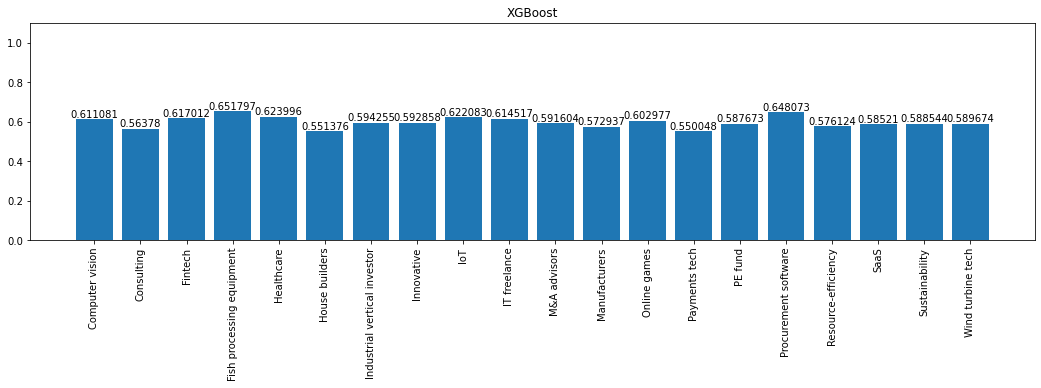

In [15]:
_,_ = plot_accuracies(acc, "XGBoost")
plt.show()

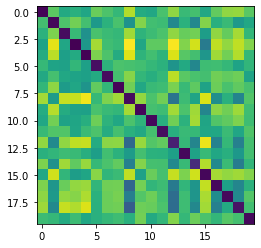

In [16]:
plt.imshow(accuracies)